# 量子コンピュータ銘柄

In [40]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [41]:
name_source = "量子コンピュータ銘柄.xlsx"
df_code = pd.read_excel(name_source)
df_code

,コード,銘柄名,市場
0,2693,ＹＫＴ,東Ｓ
1,3655,ブレインＰ,東Ｐ
2,3687,Ｆスターズ,東Ｐ
3,3741,セック,東Ｐ
4,3858,ユビＡＩ,東Ｓ
5,3915,テラスカイ,東Ｐ
6,4069,ブルーミーム,東Ｇ
7,4188,三菱ケミＧ,東Ｐ
8,4736,日本ラッド,東Ｓ
9,4847,インテリＷ,東Ｐ


In [42]:
df_result = pd.DataFrame()
for code in df_code["コード"]:
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    ser = ticker.history(period="1y")["Close"]
    df_result[code] = ser / ser.iloc[0]
df_result

,2693,3655,3687,3741,3858,3915,4069,4188,4736,4847,...,6728,6807,6838,6864,6902,7203,7713,8015,8739,9432
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-03 00:00:00+09:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2024-06-04 00:00:00+09:00,1.000000,1.005510,1.027668,1.017462,1.010225,1.006283,1.016379,1.003434,1.010025,1.007498,...,0.990646,1.004073,0.986245,1.000000,0.996288,0.987130,1.009591,0.984193,0.979096,0.994839
2024-06-05 00:00:00+09:00,0.996198,0.982553,0.999435,0.980209,0.991820,0.996859,1.016379,0.986621,0.987469,0.984068,...,0.964811,1.004073,0.977992,0.983260,0.965032,0.963185,0.998082,0.952371,0.961017,0.983871
2024-06-06 00:00:00+09:00,1.007605,0.976125,1.006211,0.977881,0.973415,0.976440,1.000000,0.979280,0.959900,0.971884,...,0.995991,1.000407,0.972490,0.975330,0.970112,0.979647,1.000000,0.951743,0.953107,0.976129
2024-06-07 00:00:00+09:00,1.000000,0.990817,1.014681,0.993015,0.967280,0.990052,1.005172,0.979162,0.973684,0.969072,...,0.990200,0.989817,0.973865,0.994714,0.966595,0.963484,0.997442,0.960117,0.937288,0.967742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-28 00:00:00+09:00,0.931020,1.157365,1.212475,1.213017,0.836401,1.492147,0.968966,0.936479,1.012853,1.054781,...,0.460844,1.032584,1.005502,1.255286,0.779074,0.813751,0.896626,0.979098,0.883341,1.035432
2025-05-29 00:00:00+09:00,0.915503,1.168467,1.217572,1.215396,0.828221,1.513613,1.006034,0.943486,0.984930,1.071157,...,0.462380,1.047579,1.035888,1.269736,0.798616,0.845602,0.894650,0.997220,0.887466,1.041444
2025-05-30 00:00:00+09:00,0.938779,1.211024,1.245887,1.234423,0.830266,1.525654,1.006897,0.947173,0.990007,1.088496,...,0.454703,1.045913,1.023457,1.255286,0.790356,0.856270,0.897944,1.002445,0.893359,1.071505


### 日付文字列

In [43]:
dt_start = df_result.index[0]
date_str = f"{dt_start.year:04}-{dt_start.month:02}-{dt_start.day:02}"
row_last = len(df_result) - 1
dt_end = df_result.index[row_last]
date_latest_str = f"{dt_end.year:04}{dt_end.month:02}{dt_end.day:02}"
date_latest_str

'20250603'

In [44]:
df_top = df_result.iloc[row_last].sort_values(ascending=False).head(4)
df_top

6701    1.650693
6702    1.500711
6703    1.490419
3915    1.431414
Name: 2025-06-03 00:00:00+09:00, dtype: float64

In [45]:
list_top = list(df_top.index)
list_top

[6701, 6702, 6703, 3915]

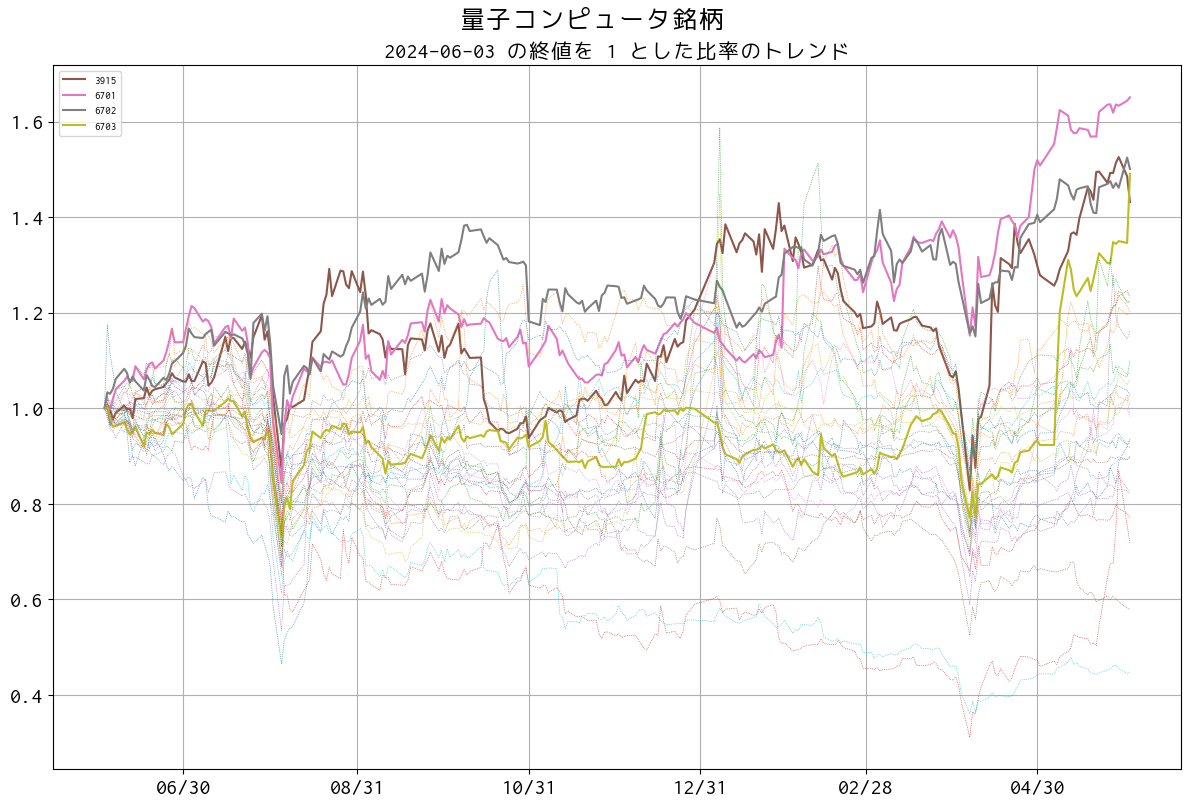

In [53]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91, left=0.05, bottom=0.03, right=0.99)

for colname in df_result.columns:
    if colname in list_top:
        width = 1.5
        lstyle = "solid"
        ax.plot(df_result[colname], lw=width, ls=lstyle, label=colname)
    else:
        width = 0.5
        lstyle = "dotted"
        ax.plot(df_result[colname], lw=width, ls=lstyle)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
fig.suptitle("量子コンピュータ銘柄")
ax.set_title(f"{date_str} の終値を 1 とした比率のトレンド", fontsize=16)
ax.grid()
ax.legend(loc='upper left', fontsize=8)
#plt.tight_layout()

plt.savefig(f"screenshots/{date_latest_str}_report_quantum_computer.png")
plt.show()

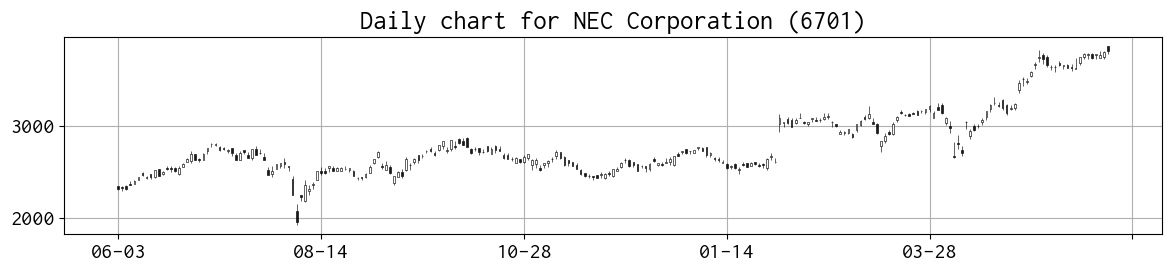

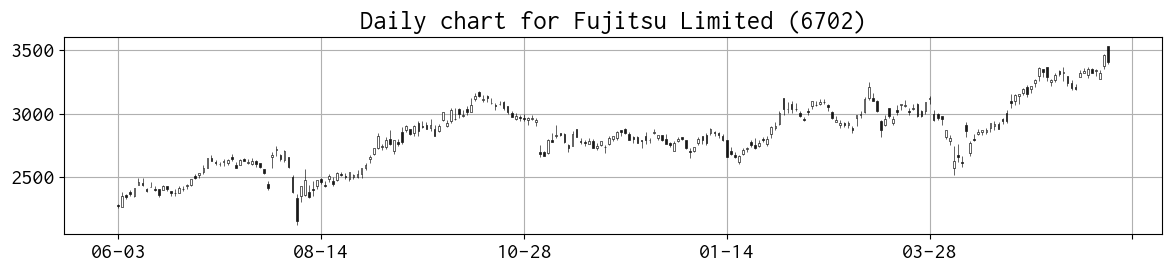

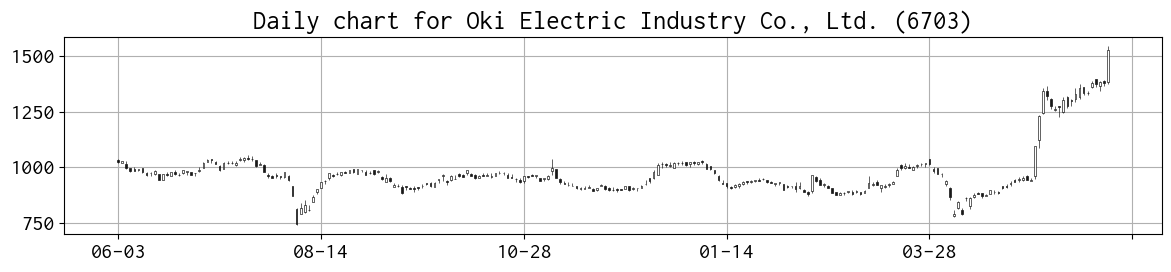

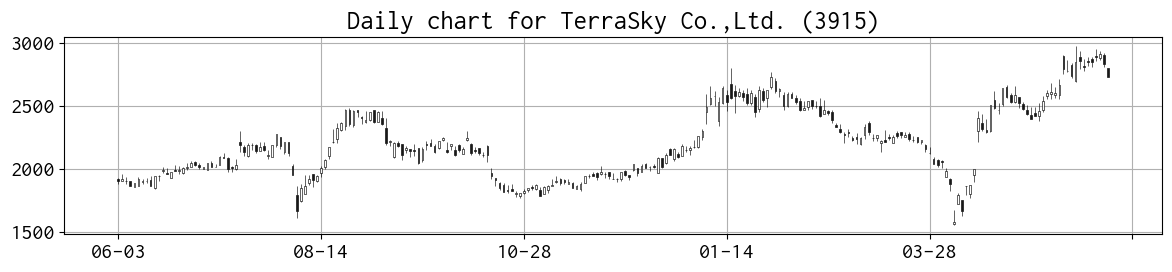

In [47]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16

for code in list_top:
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    df = ticker.history(period="1y")
    fig, ax = plt.subplots(figsize=(12, 3))
    mpf.plot(
        df,
        type='candle',
        style='default',
        volume=False,
        datetime_format='%m-%d',
        xrotation=0,
        ax=ax
    )
    ax.set_ylabel(None)
    ax.grid()
    ax.set_title(f"Daily chart for {ticker.info['longName']} ({code})")
    plt.tight_layout()
    plt.savefig(f"screenshots/{date_latest_str}_daily_chart_{code}.png")
    plt.show()